# Potential Client Data Analysis
Abelling sales team is trying to analyse their potential sales clients. They have a list of companies(targets) that could be a possible client for their data labeling services. Someone scraped a list of companies from crunchbase using filters of specific tags in the target's "categories" (business/solution domains where the target company operates. Like, autonomous vehicles, artificial intelligence, computer vision etc) and "location" (target company's registered hq location) fields. They want to make something out of this data. Now I am trying to help them out.


## Importing Packages

In [1]:
#importing required packages
import numpy as np
import pandas as pd 
import re
import statistics
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
df_data = pd.read_csv('../input/abelling/bay_ml.csv')
df_data.head(10)

,Name,Categories,HQ location,Short Desc,CB Rank,Website,Twitter,Linkedin,Email,Phone,Operational Status,Founded,HQ region,Estimated Revenue,Type,Facebook,Full Desc,Acquired By,Total Funding
0,CrowdStrike,"Cyber Security, Machine Learning, Network Secu...","Sunnyvale, California, United States",CrowdStrike is a cybersecurity technology firm...,11,http://www.crowdstrike.com,http://twitter.com/CrowdStrike,https://www.linkedin.com/company/crowdstrike/,info@crowdstrike.com,1.888.512.8906,Active,2011,"San Francisco Bay Area, Silicon Valley, West C...",$50M to $100M,For Profit,View on Facebook,CrowdStrike is a cybersecurity technology firm...,—,"$481,000,000"
1,Quora,"Information Services, Internet, Machine Learni...","Mountain View, California, United States",Quora is a Q&A platform with a mission to shar...,73,http://quora.com,http://twitter.com/Quora,http://www.linkedin.com/company/quora,—,—,Active,"Jun 1, 2009","San Francisco Bay Area, Silicon Valley, West C...",$10M to $50M,For Profit,View on Facebook,Quora is a question-and-answer website created...,—,"$226,000,000"
2,Google,"Ad Network, Artificial Intelligence, Blogging ...","Mountain View, California, United States",Google is a multinational corporation that is ...,125,http://www.google.com/,https://twitter.com/google,http://www.linkedin.com/company/google,google@google.com,—,Active,"Sep 4, 1998","San Francisco Bay Area, Silicon Valley, West C...",$10B+,For Profit,View on Facebook,Google is a multinational corporation that is ...,—,"$36,100,000"
3,uBiome,"Health Care, Machine Learning, Quantified Self","San Francisco, California, United States",uBiome is a citizen science startup that seque...,148,http://ubiome.com,http://twitter.com/uBiome,http://www.linkedin.com/company/ubiome,info@ubiome.com,(415)275-2461,Active,"Nov 1, 2012","San Francisco Bay Area, West Coast, Western US",—,For Profit,View on Facebook,uBiome is a citizen science startup that seque...,—,"$109,851,193"
4,Cloudera,"Analytics, Big Data, Cloud Computing, Cloud Da...","Palo Alto, California, United States",Cloudera delivers an Enterprise Data Cloud for...,188,http://www.cloudera.com,http://twitter.com/cloudera,http://www.linkedin.com/company/cloudera,info@cloudera.com,8887891488,Active,"Oct 13, 2008","San Francisco Bay Area, Silicon Valley, West C...",—,For Profit,View on Facebook,Cloudera delivers an Enterprise Data Cloud for...,—,"$1,041,000,000"
5,Tara AI,"Artificial Intelligence, Developer Tools, Ente...","San Jose, California, United States","Tara AI is the Smart Scoping Platform, leverag...",248,https://tara.ai/,https://twitter.com/taradotai,https://www.linkedin.com/company/13208908/,hello@tara.ai,(888) 843-9855,Active,2016,"San Francisco Bay Area, Silicon Valley, West C...",—,For Profit,View on Facebook,Tara AI is the Smart Scoping Platform. Our pla...,—,"$13,000,000"
6,Text IQ,"Artificial Intelligence, Compliance, Enterpris...","San Francisco, California, United States",Text IQ uses groundbreaking AI technology to p...,294,http://www.textiq.com,https://twitter.com/textiq,https://www.linkedin.com/company/textiq,—,(415)275-2265,Active,2014,"San Francisco Bay Area, West Coast, Western US",—,For Profit,View on Facebook,Text IQ uses AI technology to prevent high-sta...,—,"$15,600,000"
7,HOVER,"3D Technology, Computer Vision, Enterprise Sof...","San Francisco, California, United States",HOVER is a 3D technology company that creates ...,325,http://www.hover.to,https://twitter.com/HOVER3D,http://www.linkedin.com/company/hover-inc-,info@hover.to,+1 844-754-6837,Active,Mar 2011,"San Francisco Bay Area, West Coast, Western US",—,For Profit,View on Facebook,"HOVER, the company on a mission to create a si...",—,"$67,300,000"
8,Wish,"Computer, Content Discovery, E-Commerce, Machi...","San Francisco, California, United States","Wish is shopping app, putting a digital shoppi...",427,http://wish.com,https://twitter.com/WishShopping,http://www.linkedin.com/company/contextlogic,info@wish.com,(888)-254-9617,Active,2010,"S

## Exploring Data

First, let's check out the attributes of the dataset.

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                1000 non-null   object
 1   Categories          1000 non-null   object
 2   HQ location         1000 non-null   object
 3   Short Desc          1000 non-null   object
 4   CB Rank             1000 non-null   object
 5   Website             993 non-null    object
 6   Twitter             792 non-null    object
 7   Linkedin            853 non-null    object
 8   Email               1000 non-null   object
 9   Phone               1000 non-null   object
 10  Operational Status  1000 non-null   object
 11  Founded             1000 non-null   object
 12  HQ region           1000 non-null   object
 13  Estimated Revenue   1000 non-null   object
 14  Type                1000 non-null   object
 15  Facebook            666 non-null    object
 16  Full Desc           1000 

Here, we see, there are 19 attributes and 1000 entries in the dataset. Now, we will analyse the attributes one by one.

### Attribute 0: Name 

In [4]:
df_data['Name'].value_counts()

Bigfoot Biomedical     4
uBiome                 2
Aktana                 2
Jumpstart              2
ROYBI                  2
                      ..
Laserlike              1
KangarooHealth Inc.    1
Clever Sense           1
Vitagene               1
Wit.ai                 1
Name: Name, Length: 899, dtype: int64

Here, we can see there are some duplicate entries for same company names. So, we can drop duplicate entries keeping only the single entry having the highest CB rank. 

In [5]:
df_data = df_data.drop_duplicates(subset = 'Name', keep = 'first') #here, we are dropping duplicate entries
df_data.to_csv('temp.csv', index = False)
df_data = pd.read_csv('temp.csv')
df_data['Name'].value_counts()

uBiome           1
Zymergen         1
Percept.AI       1
Airlitix         1
Bevov, Inc       1
                ..
Elastica         1
idevelop.city    1
Aluna            1
Prism Skylabs    1
CloudMinds       1
Name: Name, Length: 899, dtype: int64

Now we can see, there left only 899 entries with unique company names out of 1000 given entries.

### Attribute 1: Categories
In this attribute, we can find several categories of the companies.

In [6]:
df_data[['Name','Categories']].head(5)

,Name,Categories
0,CrowdStrike,"Cyber Security, Machine Learning, Network Secu..."
1,Quora,"Information Services, Internet, Machine Learni..."
2,Google,"Ad Network, Artificial Intelligence, Blogging ..."
3,uBiome,"Health Care, Machine Learning, Quantified Self"
4,Cloudera,"Analytics, Big Data, Cloud Computing, Cloud Da..."


In [7]:
df_data['Categories'].value_counts()

Artificial Intelligence, Machine Learning, Software                                                                                                   12
Artificial Intelligence, Information Technology, Machine Learning                                                                                      7
Artificial Intelligence, Machine Learning                                                                                                              7
Artificial Intelligence, Machine Learning, Natural Language Processing                                                                                 6
Artificial Intelligence, Big Data, Machine Learning, Software                                                                                          4
                                                                                                                                                      ..
Apps, Artificial Intelligence, Developer APIs, Enterprise Software, Facial Recogni

Here, we see that each entry can have different combination of categories. Now we will extract individuals unique categories and count their occurence. 

In [8]:
categories_set = set({})
categories_count = {}
for combination in df_data['Categories']:
    ls = combination.split(',')
    for individual in ls:
        if individual[0] == ' ':
            individual = individual[1:]
        categories_set.add(individual)
        if individual in categories_count:
            categories_count[individual] += 1
        else:
            categories_count[individual] = 1    
#now sorting the dictionary with respect to occurence count            
categories_count = sorted(categories_count.items(), key=lambda x: x[1], reverse = True)            

In [9]:
for category, count in categories_count:
    print(category, count)    

Machine Learning 899
Artificial Intelligence 549
Software 210
Big Data 192
Analytics 147
SaaS 134
Enterprise Software 118
Information Technology 117
Predictive Analytics 94
Computer Vision 79
Natural Language Processing 76
Health Care 67
Mobile 60
Internet of Things 57
Internet 48
Robotics 46
E-Commerce 35
FinTech 35
Cloud Computing 33
Business Intelligence 31
B2B 30
Mobile Apps 29
Augmented Reality 27
Security 26
Apps 26
Advertising 26
Automotive 23
Virtual Reality 23
Blockchain 23
CRM 22
Autonomous Vehicles 22
Computer 21
Marketing Automation 21
Personalization 21
Education 21
Customer Service 21
Human Resources 21
Financial Services 20
Biotechnology 20
Retail Technology 19
Data Visualization 19
Video 19
Cloud Data Services 18
Intelligent Systems 18
Sales Automation 18
Developer APIs 18
Cyber Security 17
Marketing 17
Messaging 17
Recruiting 17
Developer Tools 16
3D Technology 16
Manufacturing 16
Sales 15
Consulting 14
Social Media 13
Search Engine 13
Software Engineering 13
Digital M

Here, we can see the list of unique categories with their corresponding occurence (sorted descendently).

In [10]:
print(len(categories_count))

368


There are 368 unique categories in this data.

Analysing with so many unique categories is a tedious job. So, we will only keep a few top categories which covers around 95% of total entries.

In [11]:
categories_count = dict(categories_count)
top_categories_count = {key:val for key,val in categories_count.items() if val>45} # 899 * 5% = 45 (approx.) 

Now we will plot top categories with their occurrences.

{'Machine Learning': 899, 'Artificial Intelligence': 549, 'Software': 210, 'Big Data': 192, 'Analytics': 147, 'SaaS': 134, 'Enterprise Software': 118, 'Information Technology': 117, 'Predictive Analytics': 94, 'Computer Vision': 79, 'Natural Language Processing': 76, 'Health Care': 67, 'Mobile': 60, 'Internet of Things': 57, 'Internet': 48, 'Robotics': 46}


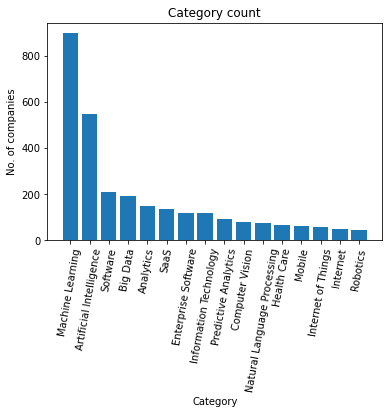

In [12]:
print(top_categories_count)
plt.bar(*zip(*top_categories_count.items()))
plt.xticks(rotation=80)
plt.xlabel('Category')
plt.ylabel('No. of companies')
plt.title('Category count')
plt.show()

Here, we see, some top categories which includes machine learning, artificial intelligence, software, big data etc. From these categories, machine learning occurs  899 times which means 100% entries have this category. So it is a most important category.

### Attribute 2: HQ location
Here, locations of head quarters are given for different companies.

In [13]:
df_data[['Name','HQ location']].head(5)

,Name,HQ location
0,CrowdStrike,"Sunnyvale, California, United States"
1,Quora,"Mountain View, California, United States"
2,Google,"Mountain View, California, United States"
3,uBiome,"San Francisco, California, United States"
4,Cloudera,"Palo Alto, California, United States"


In [14]:
df_data['HQ location'].value_counts()

San Francisco, California, United States          403
Palo Alto, California, United States              108
San Jose, California, United States                53
Mountain View, California, United States           53
Sunnyvale, California, United States               45
San Mateo, California, United States               35
Santa Clara, California, United States             31
Berkeley, California, United States                30
Redwood City, California, United States            26
Menlo Park, California, United States              23
Oakland, California, United States                 11
Los Altos, California, United States                9
Fremont, California, United States                  9
Pleasanton, California, United States               5
Campbell, California, United States                 5
Foster City, California, United States              4
San Carlos, California, United States               4
Cupertino, California, United States                4
Burlingame, California, Unit

In [15]:
city_set = set({})
state_set = set({})
country_set = set({})
city_count = {}
state_count = {}
country_count = {}
for combination in df_data['HQ location']:
    ls = combination.split(',')
    for i in range(len(ls)):
        if ls[i][0] == ' ':
            ls[i] = ls[i][1:]
        if i == 0:
            city_set.add(ls[i])
            if ls[i] in city_count:
                city_count[ls[i]] += 1
            else:
                city_count[ls[i]] = 1
        elif i == 1:
            state_set.add(ls[i])
            if ls[i] in state_count:
                state_count[ls[i]] += 1
            else:
                state_count[ls[i]] = 1
        elif i == 2:
            country_set.add(ls[i])
            if ls[i] in country_count:
                country_count[ls[i]] += 1
            else:
                country_count[ls[i]] = 1        
            
#now sorting the dictionary with respect to occurence count            
city_count = sorted(city_count.items(), key=lambda x: x[1], reverse = True)  
state_count = sorted(state_count.items(), key=lambda x: x[1], reverse = True)
country_count = sorted(country_count.items(), key=lambda x: x[1], reverse = True) 

In [16]:
print('Total number of cities: ', len(city_set))
for city, count in city_count:
    print(city, count)

Total number of cities:  44
San Francisco 403
Palo Alto 108
Mountain View 53
San Jose 53
Sunnyvale 45
San Mateo 35
Santa Clara 31
Berkeley 30
Redwood City 26
Menlo Park 23
Oakland 11
Los Altos 9
Fremont 9
Campbell 5
Pleasanton 5
Foster City 4
Cupertino 4
San Carlos 4
South San Francisco 3
Burlingame 3
San Ramon 3
Santa Cruz 3
Stanford 3
Emeryville 2
Milpitas 2
Richmond 2
Portola Valley 2
Dublin 2
Walnut Creek 1
Millbrae 1
Santa Rosa 1
Sausalito 1
Sonoma 1
Los Gatos 1
San Salvador 1
Greenbrae 1
Vallejo 1
Lafayette 1
San Leandro 1
San Rafael 1
Mill Valley 1
Hayward 1
Newark 1
Saratoga 1


['San Francisco', 'Palo Alto', 'Mountain View', 'San Jose', 'Sunnyvale', 'San Mateo', 'Santa Clara', 'Berkeley', 'Redwood City', 'Others']
[403, 108, 53, 53, 45, 35, 31, 30, 26, 115]


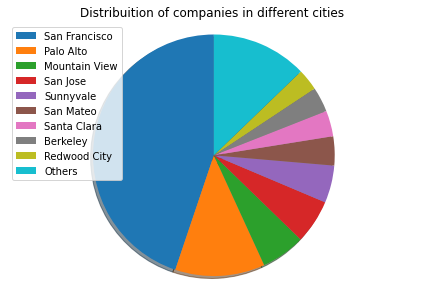

In [17]:
value = []
label = []
sum_ = 0
for i in range(9):
    label.append(city_count[i][0])
    value.append(city_count[i][1])
    sum_ += city_count[i][1]
label.append('Others')
value.append(df_data.shape[0] - sum_)

print(label)
print(value)
patches, texts = plt.pie(value, shadow=True, startangle=90)
plt.legend(patches, label, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Distribuition of companies in different cities')
plt.show()

In the pie chart, distribuition of the companies in different cities. Here, we can observe that, San Francisco contains most of the companies which is 402 in number (almost 50%). 

In [18]:
print('Total number of states: ', len(state_set))
for state, count in state_count:
    print(state, count)

Total number of states:  2
California 898
San Salvador 1


Here, we see, there only two states - California and San Salvador. All the companies are from California except one.

In [19]:
print('Total number of countries: ', len(country_set))
for country, count in country_count:
    print(country, count)

Total number of countries:  2
United States 898
El Salvador 1


Here, we see, there only two countries - United States and El Salvador. All the companies are from United States except one.

Finally, by obseving these all, we can say, most of the companies of the given dataset are based on California, United States.

### Attribute 3: Short Desc
In this attribute, we get the short descriptions of the companies. For now, we will ignore this attribute in this analyse. Later, we can use this if required.

In [20]:
df_data[['Name','Short Desc']].head(5)

,Name,Short Desc
0,CrowdStrike,CrowdStrike is a cybersecurity technology firm...
1,Quora,Quora is a Q&A platform with a mission to shar...
2,Google,Google is a multinational corporation that is ...
3,uBiome,uBiome is a citizen science startup that seque...
4,Cloudera,Cloudera delivers an Enterprise Data Cloud for...


### Attribute 4: CB Rank
This attribute provides crunchbase ranks, it signifies the reputaiton of the companies.

In [21]:
df_data[['Name','CB Rank']].head(5)

,Name,CB Rank
0,CrowdStrike,11
1,Quora,73
2,Google,125
3,uBiome,148
4,Cloudera,188


Here, we will pre-process values of CB Rank attribute. By omitting commas (',') and converting strings to integer forms. 

In [22]:
df_data = df_data.dropna(subset = ['CB Rank']) 
df_data['CB Rank']

0           11
1           73
2          125
3          148
4          188
        ...   
894    207,214
895    208,521
896    208,635
897    211,519
898    211,964
Name: CB Rank, Length: 899, dtype: object

In [23]:
rank_list = []

for i in range(len(df_data['CB Rank'])):
    df_data['CB Rank'][i] = re.sub("[^\d\.]", "", str(df_data['CB Rank'][i])) #here we are omitting commas
    df_data['CB Rank'][i] = int(df_data['CB Rank'][i])
    rank_list.append(df_data['CB Rank'][i])


In [24]:
df_data['CB Rank'] = pd.DataFrame(rank_list)
df_data['CB Rank'].tail(5)

894    207214
895    208521
896    208635
897    211519
898    211964
Name: CB Rank, dtype: int64

Here, we will sort the companies according to CB Rank into three tiers - high rank, medium rank and low rank.

In [25]:
min_ = min(rank_list) #minimum rank of the list is stored
max_ = max(rank_list) #maximum rank of the list is stored
range_ = max_ - min_  #this is the range of values of CB Ranks
range1 = (min_, min_ + range_//3) 
range2 = (range1[1] + 1, (2*range_)//3)
range3 = (range2[1] + 1, max_)
range1, range2, range3

((11, 70662), (70663, 141302), (141303, 211964))

<html>
<body>

<h10>The list of three tiers - </h10>

<ul>
  <li>The high ranked companies range in [11, 70662]</li>
  <li>The medium ranked companies range in [70663, 141302]</li>
  <li>The low ranked companies range in [141303, 211964]</li>
</ul>  

</body>
</html>

In [26]:
count_range1 = 0
count_range2 = 0
count_range3 = 0
for item in rank_list:
    if item >= range1[0] and item <= range1[1]:
        count_range1 += 1
    elif item >= range2[0] and item <= range2[1]:
        count_range2 += 1
    elif item >= range3[0] and item <= range3[1]:
        count_range3 += 1      

Now, we will observe the distribuition of ranks of different companies through a pie chart for 'High Rank', 'Medium Rank', and 'Lower Rank' tiers of CB ranks.

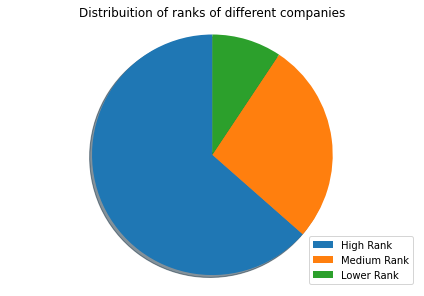

In [27]:
label = ['High Rank', 'Medium Rank', 'Lower Rank']
value = [count_range1, count_range2, count_range3]
patches, texts = plt.pie(value, shadow=True, startangle=90)
plt.legend(patches, label, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Distribuition of ranks of different companies')
plt.show()

From this distribution, we can see that most of the companies are high ranked. 

By experimenting another approach, we can observe this 'CB Rank' attribute. Here, we will split the values accroding to the mean value.

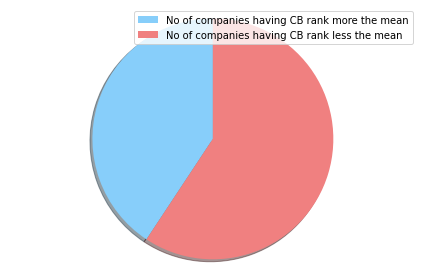

In [28]:
import statistics
x = statistics.mean(rank_list) # x is containg the mean of the rank's list
count1 = 0
count2 = 0
for item in rank_list:
    if item >= x:
        count1 += 1
    else:
        count2 += 1

labels = ['No of companies having CB rank more the mean', 'No of companies having CB rank less the mean']
sizes = [count1, count2]
colors = ['lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

From the above pie chart, we see that there are more companies having CB Rank less than mean.

### Attribute 5: Website 

In [29]:
df_data[['Name','Website']].head(5)

,Name,Website
0,CrowdStrike,http://www.crowdstrike.com
1,Quora,http://quora.com
2,Google,http://www.google.com/
3,uBiome,http://ubiome.com
4,Cloudera,http://www.cloudera.com


By accessing important informations from websites of different companies, we can enrich our dataset which will be useful for several furture experiments. Now, we can skip this attribute and observe other upcoming attributes.

### Attribute 6: Twitter

In [30]:
df_data['Twitter'].value_counts()

https://twitter.com/hunamakia              1
https://twitter.com/lucidinside?lang=en    1
https://www.twitter.com/enigmapattern      1
https://www.twitter.com/scanta_io          1
https://twitter.com/clearbraininc          1
                                          ..
https://twitter.com/kynditech              1
http://twitter.com/JetpacApp               1
https://twitter.com/cloudmedicx            1
http://twitter.com/getdesti                1
http://twitter.com/adello                  1
Name: Twitter, Length: 698, dtype: int64

By accessing important informations from twitter accounts of different companies, we can enrich our dataset which will be useful for several furture observations. Now, we can skip this attribute and observe other upcoming attributes.

### Attribute 7: Linkedin

In [31]:
df_data['Linkedin'].value_counts()

http://www.facebook.com/DeserveCards                               1
https://www.linkedin.com/company/12956248                          1
http://www.linkedin.com/company/provectus-it-inc                   1
https://www.linkedin.com/company/youspace/?originalSubdomain=in    1
https://www.linkedin.com/company/aiincorporated                    1
                                                                  ..
https://www.linkedin.com/company/clearlaw/about/                   1
https://www.linkedin.com/company/fitbod-llc                        1
https://www.linkedin.com/company/inversation/                      1
https://www.linkedin.com/company/11179272/                         1
https://www.linkedin.com/company/silta                             1
Name: Linkedin, Length: 754, dtype: int64

By accessing important data and finding out chief features from linkedin profiles of different companies, we can enrich our dataset which will be useful for furture experiments. Now, we can skip this attribute and observe other upcoming attributes.

### Attribute 8: Email

In [32]:
df_data['Email'].value_counts()


—                          142
support@moesif.com           1
info@zepl.com                1
hello@tonic.ai               1
support@ph-networks.com      1
                          ... 
hello@beyondpricing.com      1
info@crowdstrike.com         1
hi@ansaro.ai                 1
founders@reduct.video        1
info@uhana.io                1
Name: Email, Length: 758, dtype: int64

Here invalid email symbol represents the null value in this field. As we can see that around 142 email id are not given, so we can conclude that the data quality for the attribute 'Email' is not good. 

### Attribute 9: Phone
For finding out potential clients, the attribute 'Phone' has no impact actually. 

In [33]:
df_data['Phone'].value_counts()

—                    481
855-695-8636           2
(650) 665-9603         2
(408)758-0356          1
+18443762777           1
                    ... 
(510)579-8785          1
+1 (650) 425-9957      1
(562) 774-4678         1
(650)401-8282          1
(650) 353-2377         1
Name: Phone, Length: 417, dtype: int64

As we see, there are exactly 481 fields of phone number which are 'not given'. So the quality of this attribute 'Phone' in the dataset is not satisfactory.

### Attribute 10: Operational Status

In [34]:
df_data['Operational Status'].value_counts()

Active    874
Closed     25
Name: Operational Status, dtype: int64

In [35]:
df_data = df_data[df_data['Operational Status'] == 'Active']
df_data.to_csv('temp.csv', index = False)
df_data = pd.read_csv('temp.csv')
df_data['Operational Status'].value_counts()

Active    874
Name: Operational Status, dtype: int64

Actually, the companies having Operational Status as 'Closed', should not be considered. The abelling sales team must consider those companies whose Operational Status is 'Active'.

### Attribute 11: Founded 

In [36]:
df_data['Founded'].value_counts()

2016            58
2015            54
2017            47
2014            44
2013            43
                ..
Feb 7, 2017      1
Nov 15, 2014     1
Oct 14, 2014     1
Sep 1, 2012      1
Feb 14, 2014     1
Name: Founded, Length: 387, dtype: int64

From above, we see, there are different formats for same attribute's values in the given dataset. But we can handle these fields through data pre-processing. 

In [37]:
for i in range(len(df_data['Founded'])):
    temp = df_data['Founded'][i]

    if len(temp) == 1:
        year = 16 #dummy value
    else:
        year = str(temp[-2]) + str(temp[-1])
    
    if int(year) > 20:
        year = '19' + str(year)
    else:
        year = '20' + str(year)
    
    df_data['Founded'][i] = int(year)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
df_data['Founded'] = df_data['Founded'].astype(int)
print(df_data['Founded'].value_counts())

2016    172
2015    137
2017    127
2014    108
2013     80
2018     70
2012     49
2011     40
2010     22
2019     13
2009     13
2008     10
2007      8
2005      6
2006      4
2000      3
1999      3
2001      2
1997      2
2004      1
2003      1
1998      1
1994      1
1992      1
Name: Founded, dtype: int64


After pre-processing this attribute, we are considering only the year from the values of founded date.

In [39]:
founded_count = dict(df_data['Founded'].value_counts())
founded_count = sorted(founded_count.items(), key=lambda x: x[1], reverse = True) 

[2016, 2015, 2017, 2014, 2013, 2018, 2012, 2011, 2010, 'Others']
[172, 137, 127, 108, 80, 70, 49, 40, 22, 69]


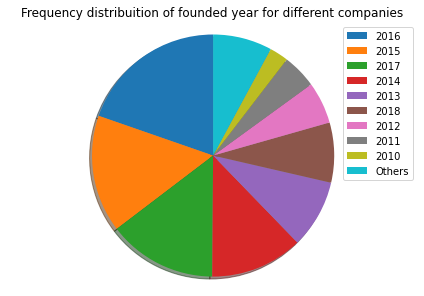

In [40]:

value = []
label = []
sum_ = 0
for i in range(9):
    label.append(founded_count[i][0])
    value.append(founded_count[i][1])
    sum_ += founded_count[i][1]
label.append('Others')
value.append(df_data.shape[0] - sum_)

print(label)
print(value)
patches, texts = plt.pie(value, shadow=True, startangle=90)
plt.legend(patches, label, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Frequency distribuition of founded year for different companies')
plt.show()

From the above pie chart, we see that frequency distribuition of founded year 2016, 2015 and 2017 are the top three most founded year. 

### Attribut 12: HQ Region

In [41]:
df_data['HQ region'].value_counts()

San Francisco Bay Area, West Coast, Western US        472
San Francisco Bay Area, Silicon Valley, West Coast    402
Name: HQ region, dtype: int64

Here, we can observe that, Head Quarter region for 'San Francisco Bay Area, West Coast, Western US' occurs mostly.

### Attribute 13: Estimated Revenue

In [42]:
df_data['Estimated Revenue'].value_counts()

—                561
$1M to $10M      196
Less than $1M    110
$10M to $50M       4
$50M to $100M      2
$10B+              1
Name: Estimated Revenue, dtype: int64

Here, exactly 561 entries of the attribute 'Estimated Revenue' are not given. So, the data quality should be improved.

In [43]:
revenue_count = dict(df_data['Estimated Revenue'].value_counts())
revenue_count = sorted(revenue_count.items(), key=lambda x: x[1], reverse = True) 

['Not Given', '$1M to $10M', 'Less than $1M', '$10M to $50M', '$50M to $100M', '$10B+']
[561, 196, 110, 4, 2, 1]


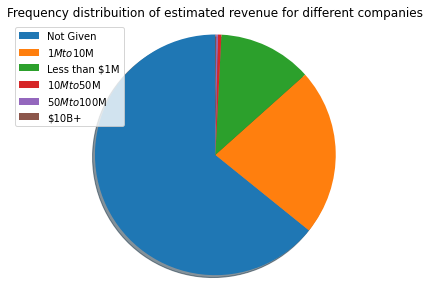

In [44]:
value = []
label = []
for i in range(len(revenue_count)):
    if len(revenue_count[i][0]) == 1:
        label.append('Not Given')
    else:    
        label.append(revenue_count[i][0])
    value.append(revenue_count[i][1])

print(label)
print(value)
patches, texts = plt.pie(value, shadow=True, startangle=90)
plt.legend(patches, label, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Frequency distribuition of estimated revenue for different companies')
plt.show()

### Attribute 14: Type

In [45]:
df_data['Type'].value_counts()

For Profit    767
—             106
Non-profit      1
Name: Type, dtype: int64

Around 106 entries for the attribue 'Type' are not given. Data quality for this attribute is not good.

### Attribute 15: Facebook

In [46]:
df_data['Facebook'].value_counts()

View on Facebook    568
Name: Facebook, dtype: int64

By accessing important data and finding out chief features from facebook accounts of different companies, we can enrich our dataset which will be useful for furture experiments. Now, we can skip this attribute and observe other upcoming attributes.

### Attribute 16: Full Desc

In [47]:
df_data[['Name','Full Desc']].head(5)

,Name,Full Desc
0,CrowdStrike,CrowdStrike is a cybersecurity technology firm...
1,Quora,Quora is a question-and-answer website created...
2,Google,Google is a multinational corporation that is ...
3,uBiome,uBiome is a citizen science startup that seque...
4,Cloudera,Cloudera delivers an Enterprise Data Cloud for...


By this attribute, we can have more idea about companies than the 'Short Desc' attribute.

### Attribute 17: Acquired By

In [48]:
df_data['Acquired By'].value_counts()

—               772
Google            5
Salesforce        5
Apple             5
Microsoft         4
               ... 
Nokia             1
Cloudera          1
NICE Systems      1
GoPro             1
Medallia          1
Name: Acquired By, Length: 80, dtype: int64

The data quality of this attribute is also not good. Here we see 772 entries are not provided.

In [49]:
acquired_count = dict(df_data['Acquired By'].value_counts())
acquired_count = sorted(acquired_count.items(), key=lambda x: x[1], reverse = True) 

['Not acquird yet', 'Google', 'Salesforce', 'Apple', 'Microsoft', 'Others']
[772, 5, 5, 5, 4, 83]


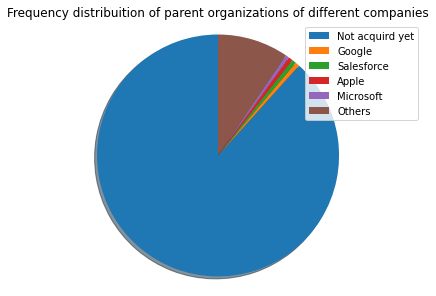

In [50]:
value = []
label = []
sum_ = 0
for i in range(5):
    if len(acquired_count[i][0]) == 1:
        label.append('Not acquird yet')
    else:    
        label.append(acquired_count[i][0])
    value.append(acquired_count[i][1])
    sum_ += acquired_count[i][1]
    
label.append('Others')
value.append(df_data.shape[0] - sum_)
print(label)
print(value)
patches, texts = plt.pie(value, shadow=True, startangle=90)
plt.legend(patches, label, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Frequency distribuition of parent organizations of different companies')
plt.show()

In the pie chart, also we can see that the largest portion of the data is not aquired.

### Attribute 18: Total Funding

In [51]:
df_data['Total Funding'].value_counts()

—               331
$2,000,000       19
$100,000         12
$1,500,000       12
$10,000,000       8
               ... 
$925,000          1
$730,000          1
$7,858,466        1
$130,000,000      1
$54,500,000       1
Name: Total Funding, Length: 355, dtype: int64

In [52]:
fund_list = []
for i in range(len(df_data['Total Funding'])):
    if len(df_data['Total Funding'][i]) == 1:
        continue
    elif df_data['Total Funding'][i][0] != '$':
        continue
    fund = df_data['Total Funding'][i]
    fund = fund.replace("$", "").replace(",", "")
    fund_list.append(int(fund))

mean_ = statistics.mean(fund_list) #mean_ containes the mean value of the data having $signs with commas
    
for i in range(len(df_data['Total Funding'])):
    df_data['Total Funding'][i] = str(df_data['Total Funding'][i])
    if len(df_data['Total Funding'][i]) == 1:
        df_data['Total Funding'][i] = mean_
    elif df_data['Total Funding'][i][0] != '$':
        df_data['Total Funding'][i] = mean_
    fund = df_data['Total Funding'][i]
    if df_data['Total Funding'][i] != mean_:
        fund = fund.replace("$", "").replace(",", "")
    df_data['Total Funding'][i] = int(fund)

df_data['Total Funding'] = df_data['Total Funding'].astype(int)
df_data['Total Funding']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyW

0       481000000
1       226000000
2        36100000
3       109851193
4      1041000000
          ...    
869      24194441
870      24194441
871      24194441
872      24194441
873      24194441
Name: Total Funding, Length: 874, dtype: int64

We can observe the total count, mean, standard deviation, minimum and maximum value. Again 25% 50% and 75% percentiles of data indicate the values below which a certain percentage of the data indataset is found. 

count    8.740000e+02
mean     2.419444e+07
std      6.652446e+07
min      1.500000e+04
25%      3.340720e+06
50%      2.419444e+07
75%      2.419444e+07
max      1.328700e+09
Name: Total Funding, dtype: float64


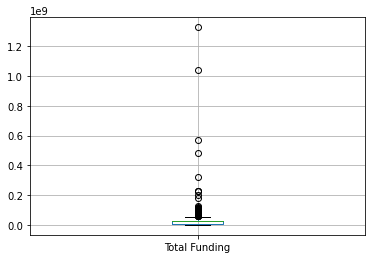

In [53]:
print(df_data['Total Funding'].describe())
df_data.boxplot(column=['Total Funding'])

From this boxplot, we can observe the distribution of the data including the outliers.

count    8.650000e+02
mean     1.908938e+07
std      2.008177e+07
min      1.500000e+04
25%      3.290000e+06
50%      2.419444e+07
75%      2.419444e+07
max      1.790000e+08
Name: Total Funding, dtype: float64


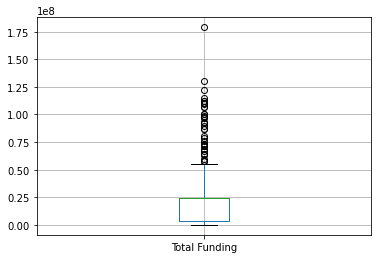

In [54]:
df_data = df_data[df_data['Total Funding']<200000000]
print(df_data['Total Funding'].describe())
df_data.boxplot(column=['Total Funding'])

Here, we are considering the data distribution in a certain range. 

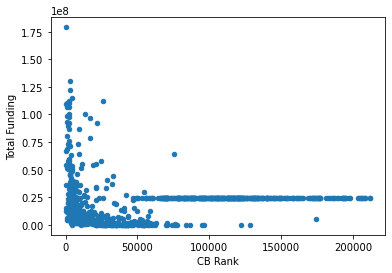

In [55]:
df_data.plot.scatter(x='CB Rank',
                      y='Total Funding')

From the above scatter plot of attributes - Total Funding and CB Rank, we see, companies having higher CB rank, contain greater amount of total funding.  

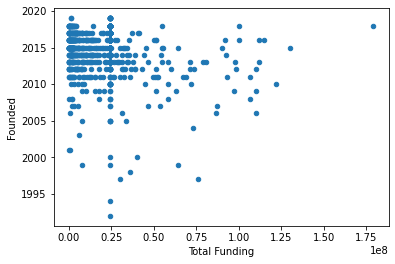

In [56]:
df_data.plot.scatter(x='Total Funding',
                      y='Founded')

From the above scatter plot of attributes - Total Funding and Founded, we see, companies founded near 2005 to 2020 are provided with funding amount less than 75000000.

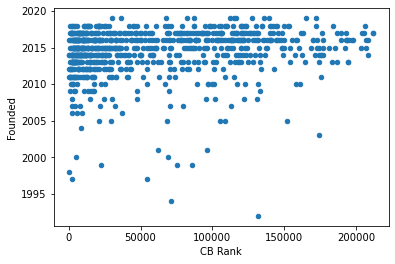

In [57]:
df_data.plot.scatter(x='CB Rank',
                      y='Founded')

From the above scatter plot, we observe that, companies founded in 2015 to 2020 are mostly ranked by CB.

In [58]:
df_data.corr(method='pearson')

,CB Rank,Founded,Total Funding
CB Rank,1.000000,0.142005,0.077042
Founded,0.142005,1.000000,-0.177867
Total Funding,0.077042,-0.177867,1.000000


As the correlation coeffecient of Founded and CB Rank is approximately 0.142 > 0; 'Founded' and 'CB Rank' are positively correlated ('Founded’s values increase as 'CB Rank’s). The higher the value, the stronger the correlation.

Similarly, as the correlation coeffecient of CB Rank and Total Funding is approximately 0.077 > 0; 'CB Rank' and 'Total Funding' are positively correlated ('CB Rank’s values increase as 'Total Funding’s). The higher the value, the stronger the correlation.

Similarly, as the correlation coeffecient of Founded and Total Funding is approximately - 0.1778 < 0; 'Founded' and 'Total Funding' are negatively correlated ('Founded’s values decreases as 'Total Funding’s). The lower the value, the stronger the correlation.

In [59]:
df_data.to_csv('refined_data.csv', index = False)